In [60]:
from standardInclude import *

In [61]:
f = r.TFile("./data/gm2offline_full.root")
t = f.Get("CoincidenceFinderLM/CoincLM")
t.Print()

******************************************************************************
*Tree    :CoincLM   : CoincLM                                                *
*Entries :   323883 : Total =        51158545 bytes  File  Size =   14476668 *
*        :          : Tree compression factor =   3.54                       *
******************************************************************************
*Br    0 :coincidenceLevel : coincidenceLevel/i                              *
*Entries :   323883 : Total  Size=    1300227 bytes  File Size  =      13394 *
*Baskets :       41 : Basket Size=      32000 bytes  Compression=  96.99     *
*............................................................................*
*Br    1 :caloNum   : vector<int>                                            *
*Entries :   323883 : Total  Size=    5893024 bytes  File Size  =     615943 *
*Baskets :      225 : Basket Size=      32000 bytes  Compression=   9.56     *
*...................................................

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


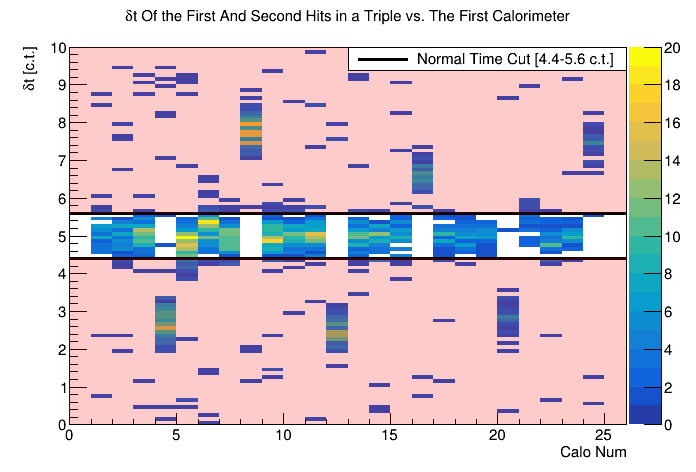

In [59]:
c = r.TCanvas()
h = r.TH2D("h","#deltat Of the First And Second Hits in a Triple vs. The First Calorimeter; Calo Num; #deltat [c.t.]",
          26,0,26,
          100,0,10)
t.Draw("clusterTime[1] - clusterTime[0]:caloNum[0]>>h","coincidenceLevel == 3","goff")
h.Draw("colz")

line1 =r.TLine(0,4.4,26,4.4)
line1.Draw("SAME")

line2 =r.TLine(0,5.6,26,5.6)
line2.Draw("SAME")

line1.SetLineWidth(3)
line1.SetLineColor(1)
line1.SetLineStyle(1)
line2.SetLineWidth(3)
line2.SetLineColor(1)
line2.SetLineStyle(1)

box1 = r.TBox(0,5.6,26,10)
box1.SetFillColorAlpha(2,0.2)
box1.Draw("SAME")

box2 = r.TBox(0,0,26,4.4)
box2.SetFillColorAlpha(2,0.2)
box2.Draw("SAME")

leg = r.TLegend(0.5,0.85,0.9,0.9)
leg.AddEntry(line2,"Normal Time Cut [4.4-5.6 c.t.]", "l")
leg.Draw("SAME")

c.Draw()

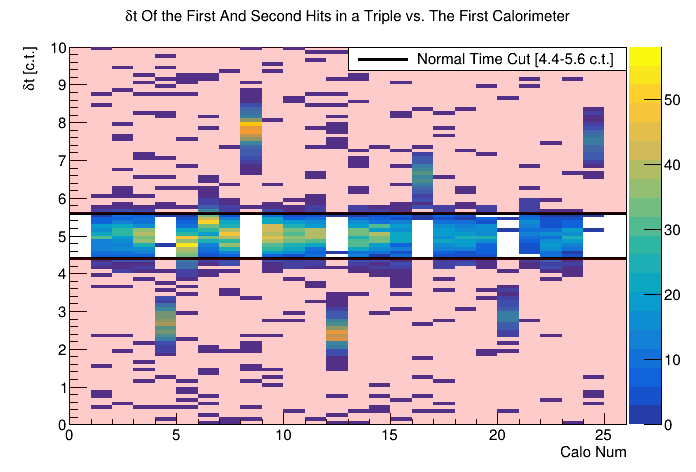

In [62]:
c = r.TCanvas()
h = r.TH2D("h","#deltat Of the First And Second Hits in a Triple vs. The First Calorimeter; Calo Num; #deltat [c.t.]",
          26,0,26,
          100,0,10)
t.Draw("clusterTime[1] - clusterTime[0]:caloNum[0]>>h","coincidenceLevel == 2","goff")
h.Draw("colz")

line1 =r.TLine(0,4.4,26,4.4)
line1.Draw("SAME")

line2 =r.TLine(0,5.6,26,5.6)
line2.Draw("SAME")

line1.SetLineWidth(3)
line1.SetLineColor(1)
line1.SetLineStyle(1)
line2.SetLineWidth(3)
line2.SetLineColor(1)
line2.SetLineStyle(1)

box1 = r.TBox(0,5.6,26,10)
box1.SetFillColorAlpha(2,0.2)
box1.Draw("SAME")

box2 = r.TBox(0,0,26,4.4)
box2.SetFillColorAlpha(2,0.2)
box2.Draw("SAME")

leg = r.TLegend(0.5,0.85,0.9,0.9)
leg.AddEntry(line2,"Normal Time Cut [4.4-5.6 c.t.]", "l")
leg.Draw("SAME")

c.Draw()

In [23]:
h = r.TH1D("h","Number of Triples by Calo; Calo Num",26,0,26)
h2 = r.TH1D("h2","Triples With #deltat Cut of (4.4,5.6); Calo Num",26,0,26)
h2.SetLineColor(2)

t.Draw("caloNum[0]>>h","coincidenceLevel == 3","goff")
t.Draw("caloNum[0]>>h2","coincidenceLevel == 3 && (clusterTime[1] - clusterTime[0]) > 4.4 && (clusterTime[1] - clusterTime[0]) < 5.6","goff")

975

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


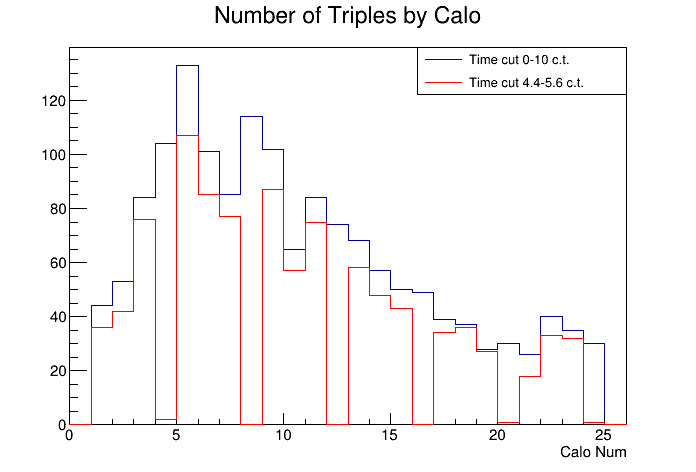

In [24]:
c =r.TCanvas()
h.Draw("")
h2.Draw("same")

leg = r.TLegend(0.6,0.8,0.9,0.9)
leg.AddEntry(h,"Time cut 0-10 c.t.", "l")
leg.AddEntry(h2,"Time cut 4.4-5.6 c.t.", "l")
leg.Draw("SAME")


c.Draw()

In [34]:
h3 = h.Clone("h3")
h3.SetTitle("Ratio of the Two Time Cuts By Calo")
for i in range(h3.GetNbinsX()):
    if(h2.GetBinContent(i) > 10):
        content = h.GetBinContent(i) / h2.GetBinContent(i)
    else:
        content = 0
    h3.SetBinContent(i, content)

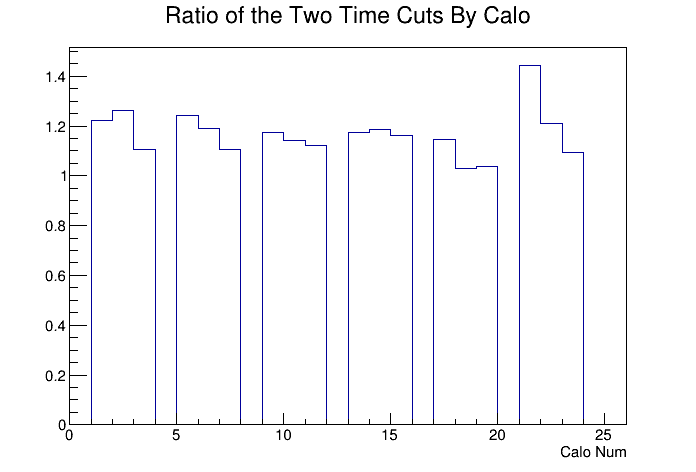

In [39]:
c = r.TCanvas()
h3.Draw()
#c.SetLogy()
c.Draw()

In [41]:
ding = []
for i in range(h3.GetNbinsX()):
    content = h3.GetBinContent(i)
    if(content > 0):
        ding.append(content)
print(np.mean(ding))

1.16900948056807
